# MoMA Artists: Exploratory Data Analysis & Visualization

This notebook details the steps taken to conduct an exploratory analysis on the artists dataset provided by the 
Museum of Modern Art (MoMA). This dataset includes artists who have works in MoMA's collection and have been cataloged
in its database. This exploratory analysis attempts to uncover any themes in representation and to get a better idea of what kinds of artists are represented the most at MoMA.

In [1]:
#First begin by importing the following libraries to conduct the analysis and create visualizations:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Then read the CSV file to get a better picture of the data:

artists = pd.read_csv("https://media.githubusercontent.com/media/MuseumofModernArt/collection/master/Artists.csv")
artists

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate,Wiki QID,ULAN
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992,NaN,NaN
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0,NaN,NaN
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0,NaN,NaN
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0,Q1063584,500027998.0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15231,132538,Noah Davis,"American, 1983–2015",American,Male,1983,2015,NaN,NaN
15232,132545,Ann Tyng,"American, born China, 1920–2011",American,Female,1920,2011,NaN,NaN
15233,132719,Dalton Paula,"Brazilian, born 1982",Brazilian,NaN,1982,0,NaN,NaN
15234,132734,Hans Behrendt,"German, 1889–1942",German,Male,1889,1942,NaN,NaN


In [3]:
#Drop the following columns that are not necessary for my current analysis:

artists.drop(columns = ['Wiki QID', 'ULAN'], inplace = True)
artists

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,BeginDate,EndDate
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0
...,...,...,...,...,...,...,...
15231,132538,Noah Davis,"American, 1983–2015",American,Male,1983,2015
15232,132545,Ann Tyng,"American, born China, 1920–2011",American,Female,1920,2011
15233,132719,Dalton Paula,"Brazilian, born 1982",Brazilian,NaN,1982,0
15234,132734,Hans Behrendt,"German, 1889–1942",German,Male,1889,1942


In [4]:
# Determine if there are any missing data:

print('artists missing data:')
print(artists.isnull().sum())

artists missing data:
ConstituentID       0
DisplayName         0
ArtistBio        2203
Nationality      2447
Gender           3131
BeginDate           0
EndDate             0
dtype: int64


In [5]:
#Fill in missing data:

artists['ArtistBio'].fillna('N/A', inplace = True) 
artists['Nationality'].fillna('N/A', inplace = True) 
artists['Gender'].fillna('N/A', inplace = True) 

In [6]:
#Check data types:

df = artists
df.dtypes

ConstituentID     int64
DisplayName      object
ArtistBio        object
Nationality      object
Gender           object
BeginDate         int64
EndDate           int64
dtype: object

In [7]:
#See that several columns are objects and want to change them to strings.

df['Nationality'] = df['Nationality'].astype(str)
df['Gender'] = df['Gender'].astype(str)
df['ArtistBio'] = df['ArtistBio'].astype(str)

In [8]:
#Confirm that the number of entries are consistent with what MoMA's Github states. We both have 15,236 records.

len(df)

15236

In [9]:
#Get all the unique values in 'Gender' to help in cleaning the data and determining any inconsistent entries.
#Then sort them to see the complete list.

gender = df['Gender'].unique()
gender.sort()
gender

array(['Female', 'Male', 'N/A', 'Non-Binary', 'female', 'male'],
      dtype=object)

In [10]:
#The entries for male and female are inconsistent, so replace to make it consistent.

df["Gender"].replace({"male": "Male", "female": "Female"}, inplace=True)
df['Gender'].unique()

array(['Male', 'Female', 'N/A', 'Non-Binary'], dtype=object)

In [11]:
#Same process for 'Nationality':

nationality = df['Nationality'].unique()
nationality.sort()
nationality

array(['Afghan', 'Albanian', 'Algerian', 'American', 'Argentine',
       'Australian', 'Austrian', 'Azerbaijani', 'Bahamian', 'Bangladeshi',
       'Belgian', 'Beninese', 'Bolivian', 'Bosnian', 'Brazilian',
       'British', 'Bulgarian', 'Burkinabe', 'Cambodian', 'Cameroonian',
       'Canadian', 'Canadian Inuit', 'Catalan', 'Chilean', 'Chinese',
       'Colombian', 'Congolese', 'Coptic', 'Costa Rican', 'Croatian',
       'Cuban', 'Cypriot', 'Czech', 'Czechoslovakian', 'Danish', 'Dutch',
       'Ecuadorian', 'Egyptian', 'Emirati', 'Estonian', 'Ethiopian',
       'Filipino', 'Finnish', 'French', 'Georgian', 'German', 'Ghanaian',
       'Greek', 'Guatemalan', 'Guyanese', 'Haitian', 'Hungarian',
       'Icelandic', 'Indian', 'Iranian', 'Irish', 'Israeli', 'Italian',
       'Ivorian', 'Japanese', 'Kenyan', 'Korean', 'Kuwaiti',
       'Kyrgyzstani', 'Latvian', 'Lebanese', 'Lithuanian',
       'Luxembourgish', 'Macedonian', 'Malaysian', 'Malian', 'Mexican',
       'Moroccan', 'N/A', 'Namibia

In [12]:
#See some inconsistent data entries and replace the following:

df["Nationality"].replace({"Czech": "Czechoslovakian", "Nationality unknown": "N/A"}, inplace=True)
df['Nationality'].unique()

array(['American', 'Spanish', 'Danish', 'Italian', 'French', 'Estonian',
       'Mexican', 'Swedish', 'N/A', 'Israeli', 'British', 'Finnish',
       'Polish', 'Palestinian', 'Japanese', 'Guatemalan', 'Colombian',
       'Romanian', 'Russian', 'German', 'Argentine', 'Kuwaiti', 'Belgian',
       'Dutch', 'Norwegian', 'Chilean', 'Swiss', 'Costa Rican',
       'Czechoslovakian', 'Brazilian', 'Austrian', 'Canadian',
       'Australian', 'Ukrainian', 'Hungarian', 'Haitian', 'Congolese',
       'Bolivian', 'Cuban', 'Yugoslav', 'Portuguese', 'Indian',
       'Peruvian', 'Icelandic', 'Irish', 'Guyanese', 'Uruguayan',
       'Slovak', 'Croatian', 'Greek', 'Chinese', 'Venezuelan', 'Turkish',
       'Panamanian', 'Algerian', 'Ecuadorian', 'South African', 'Iranian',
       'Korean', 'Canadian Inuit', 'Paraguayan', 'Luxembourgish',
       'Nicaraguan', 'Zimbabwean', 'Moroccan', 'Slovenian', 'Tanzanian',
       'Bulgarian', 'Tunisian', 'Sudanese', 'Taiwanese', 'Ethiopian',
       'Scottish', 'Latvia

In [13]:
#Rename 'BeginDate' and 'EndDate' columns to indicate birth and death instead and see finalized dataset:

df.rename({'BeginDate': 'Birth', 'EndDate': 'Death'}, axis=1, inplace=True)
df

,ConstituentID,DisplayName,ArtistBio,Nationality,Gender,Birth,Death
0,1,Robert Arneson,"American, 1930–1992",American,Male,1930,1992
1,2,Doroteo Arnaiz,"Spanish, born 1936",Spanish,Male,1936,0
2,3,Bill Arnold,"American, born 1941",American,Male,1941,0
3,4,Charles Arnoldi,"American, born 1946",American,Male,1946,0
4,5,Per Arnoldi,"Danish, born 1941",Danish,Male,1941,0
...,...,...,...,...,...,...,...
15231,132538,Noah Davis,"American, 1983–2015",American,Male,1983,2015
15232,132545,Ann Tyng,"American, born China, 1920–2011",American,Female,1920,2011
15233,132719,Dalton Paula,"Brazilian, born 1982",Brazilian,N/A,1982,0
15234,132734,Hans Behrendt,"German, 1889–1942",German,Male,1889,1942


# Analysis & Visualizations


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

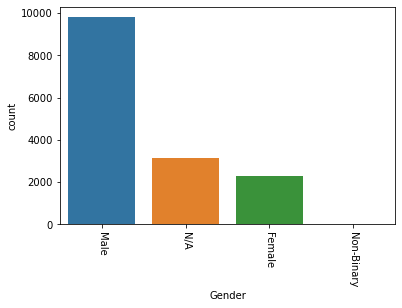

In [21]:
sns.countplot(x='Gender', data=df, order = df['Gender'].value_counts().index) 
plt.xticks(rotation=-90)

We can see that males are the gender that is most represented. We can also see that a significant number of artists don't have a gender listed, suggesting that it is unknown or missing, and that there is a group that identifies as non-binary.

In [15]:
df['Gender'].value_counts()

Male          9802
N/A           3131
Female        2301
Non-Binary       2
Name: Gender, dtype: int64

Listing the exact numbers associated with each gender.

In [16]:
df['Nationality'].nunique()

117

Obtaining the number of nationalities represented at MoMA.

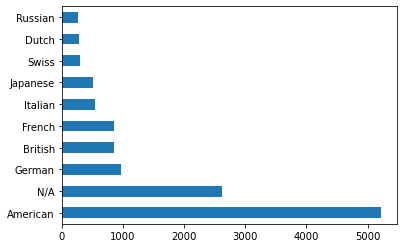

In [17]:
df['Nationality'].value_counts()[:10].plot(kind='barh')

Americans are by far the most represented group when looking at the top ten nationalities by count. The next most represented group is 'N/A,'  indicating that this information is uknown or missing. Overall, the top ten nationalities most represented at MoMA outside of America come from Europe with the exception of the Japanese, the only non-European nationality.

In [18]:
df['Nationality'].value_counts()[:10]

American    5214
N/A         2627
German       968
British      856
French       850
Italian      539
Japanese     509
Swiss        294
Dutch        277
Russian      267
Name: Nationality, dtype: int64

Listing the numbers associated with each nationality.

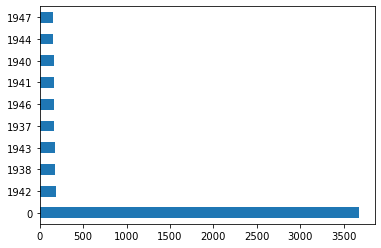

In [19]:
df['Birth'].value_counts()[:10].plot(kind='barh')

I was curious to see if any patterns or trends existed in the artists' birth year and that perhaps certain years, or time periods, produced more artists. From the chart listing the top ten birth years by count, the majority of artist birth years are actually listed as '0,' indicating that many artists' birth years are unknown or missing. 

In [20]:
df['Birth'].value_counts()[:10]

0       3672
1942     188
1938     180
1943     179
1937     170
1946     168
1941     167
1940     159
1944     158
1947     153
Name: Birth, dtype: int64

By obtaining the counts of the top ten years represented, we can see that 1942 is the most frequently occurring birth year after '0,' or unknown. It is also interesting to note that the years most represented range from the 1930's-1940's.

# Findings

From this exploratory analysis of the MoMA artist dataset, the kind of artist most represented at the museum is an American male who was born somewhere between the 1930's-1940's. However, one should note that there are many artists in the dataset who either have missing or unknown data about themselves and, therefore, may not have necessarily fit into this representaiton.